In [7]:
%run 'Functions.ipynb'

### 1. Initial training

In [74]:
data, labels, unique_mutations, aa_seq = read_data('S5')

In [75]:
model = Sequential()

init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

hist = model.fit(data, labels, epochs=500, batch_size=400, shuffle=True, verbose=0)
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

proba = model.predict_proba(data, batch_size=100, verbose=0)

true1 = labels
predicted1 = proba.flatten()
fitness_potential1 = data.dot(weights) + biases[0]

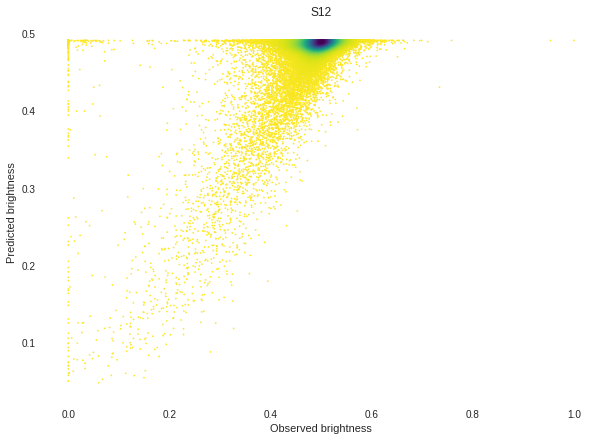

In [76]:
plt.figure(figsize = [10,7])
density_plot(true1, predicted1, chunk)

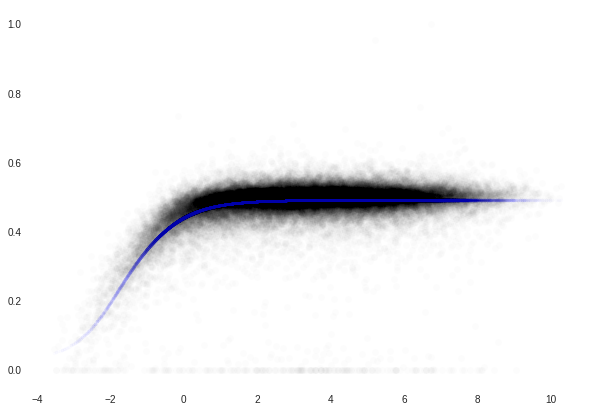

In [77]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential1, true1, 'ok', alpha = 0.01)
plt.plot(fitness_potential1, predicted1, '.b', alpha = 0.01);

In [78]:
_, _, r_value, _, _ = stats.linregress(true1,predicted1)
r_value

0.60339361755932563

### 2. Training on residuals

In [79]:
res = np.abs(true1 - predicted1)
idx = np.where(res>0.1)

In [80]:
dataRed = data[idx]
labelsRed = labels[idx]
model = Sequential()

init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(1, input_dim=dataRed.shape[1], activation='sigmoid', kernel_initializer=init))
model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

hist = model.fit(dataRed, labelsRed, epochs=500, batch_size=400, shuffle=True, verbose=0)
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

proba = model.predict_proba(data, batch_size=100, verbose=0)

true2 = labels
predicted2 = proba.flatten()
fitness_potential2 = data.dot(weights) + biases[0]

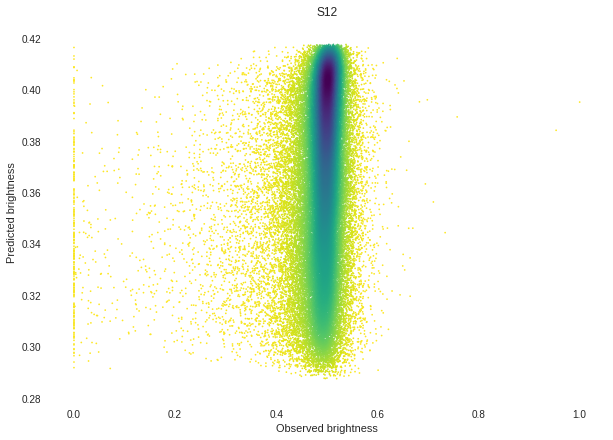

In [81]:
plt.figure(figsize = [10,7])
density_plot(true2, predicted2, chunk)

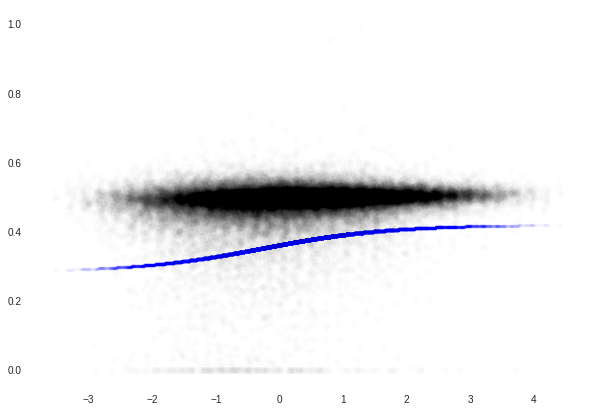

In [82]:
plt.figure(figsize = [10,7])
plt.plot(fitness_potential2, true2, 'ok', alpha = 0.01)
plt.plot(fitness_potential2, predicted2, '.b', alpha = 0.01);

In [83]:
_, _, r_value, _, _ = stats.linregress(true2,predicted2)
r_value

0.1562506493481314

### 3. Checking improvement

In [84]:
predicted1[idx] = predicted2
_, _, r_value, _, _ = stats.linregress(true1, predicted1)
r_value

/home/katya/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  if __name__ == '__main__':


0.71763838897884835